In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#dfs = pd.read_csv('~/Downloads/health.csv')
budget = pd.read_csv('~/Downloads/usa-education-budget-analysis_zip/data/budget_csv.csv')
data = pd.read_csv('~/Downloads/usa-education-budget-analysis_zip/data/data_csv.csv')

In [15]:
budget.head()
#sns.lineplot(data=budget, x='Year', y='Value')

,Name,Year,Value
0,Legislative Branch,1976,936.0
1,Legislative Branch,1977,1057.0
2,Legislative Branch,1978,1087.0
3,Legislative Branch,1979,1131.0
4,Legislative Branch,1980,1318.0


In [6]:
data.head()

,YEAR,BUDGET_ON_EDUCATION,GDP,RATIO
0,1976,9314.0,1877587.0,0.496
1,1977,10568.0,2085951.0,0.507
2,1978,11625.0,2356571.0,0.493
3,1979,13996.0,2632143.0,0.532
4,1980,15209.0,2862505.0,0.531


In [14]:
#budget.groupby("Year").sum()
budget['Name'].unique()

array(['Legislative Branch', 'Judicial Branch',
       'Department of Agriculture', 'Department of Commerce',
       'Department of Defense--Military Programs',
       'Department of Education', 'Department of Energy',
       'Department of Health and Human Services',
       'Department of Homeland Security',
       'Department of Housing and Urban Development',
       'Department of the Interior', 'Department of Justice',
       'Department of Labor', 'Department of State',
       'Department of Transportation', 'Department of the Treasury',
       'Department of Veterans Affairs',
       'Corps of Engineers--Civil Works', 'Other Defense Civil Programs',
       'Environmental Protection Agency',
       'Executive Office of the President',
       'General Services Administration',
       'International Assistance Programs',
       'National Aeronautics and Space Administration',
       'National Science Foundation', 'Office of Personnel Management',
       'Small Business Administratio

[None]

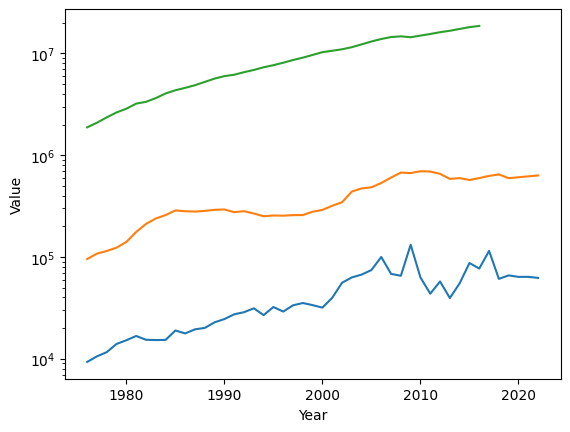

In [20]:
fig, ax = plt.subplots()
education = budget[budget['Name'] == 'Department of Education']
sns.lineplot(data=education, x='Year', y='Value')
defense = budget[budget['Name'] == 'Department of Defense--Military Programs']
sns.lineplot(data=defense, x='Year', y='Value', ax=ax)




sns.lineplot(data=data, x='YEAR', y='GDP', ax=ax)